Step 2

In [3]:
import spacy
nlp = spacy.load("en_core_web_sm")


In [5]:
import pandas as pd
from spacy import displacy

df = pd.read_csv("./archive/ner.csv")

first_five_sentences = df["Sentence"].dropna().tolist()[:5]

docs = list(nlp.pipe(first_five_sentences))

for doc in docs:
    displacy.render(doc, style="ent", jupyter=True)

Step 3

['CARDINAL', 'GPE', 'GPE', 'NORP', 'WORK_OF_ART', 'ORG', 'GPE', 'CARDINAL', 'CARDINAL', 'DATE', 'GPE', 'ORG', 'LANGUAGE', 'GPE', 'GPE', 'GPE', 'CARDINAL', 'NORP', 'GPE', 'DATE', 'GPE', 'GPE', 'GPE', 'ORG', 'ORDINAL', 'GPE', 'DATE', 'GPE', 'GPE', 'DATE', 'FAC', 'NORP', 'DATE', 'ORG', 'ORG', 'GPE', 'GPE', 'ORG', 'GPE', 'ORG', 'GPE', 'PERSON', 'DATE', 'NORP', 'GPE', 'NORP', 'CARDINAL', 'NORP', 'CARDINAL', 'NORP', 'GPE', 'LOC', 'NORP', 'PERSON', 'PERSON', 'DATE', 'ORG', 'PERSON', 'ORG', 'NORP', 'ORG', 'LOC', 'GPE', 'QUANTITY', 'DATE', 'NORP', 'GPE', 'PERSON', 'GPE', 'CARDINAL', 'GPE', 'DATE', 'CARDINAL', 'NORP', 'NORP', 'GPE', 'ORG', 'GPE', 'NORP', 'NORP', 'DATE', 'CARDINAL', 'CARDINAL', 'GPE', 'NORP', 'ORG', 'GPE', 'GPE', 'GPE', 'GPE', 'GPE', 'NORP', 'GPE', 'CARDINAL', 'NORP', 'GPE', 'DATE', 'NORP', 'CARDINAL', 'ORG', 'DATE', 'DATE', 'GPE', 'ORG', 'ORG', 'ORG', 'CARDINAL', 'DATE', 'CARDINAL', 'ORG', 'NORP', 'GPE', 'LOC', 'NORP', 'CARDINAL', 'DATE', 'CARDINAL', 'NORP', 'DATE', 'DATE', 'DAT

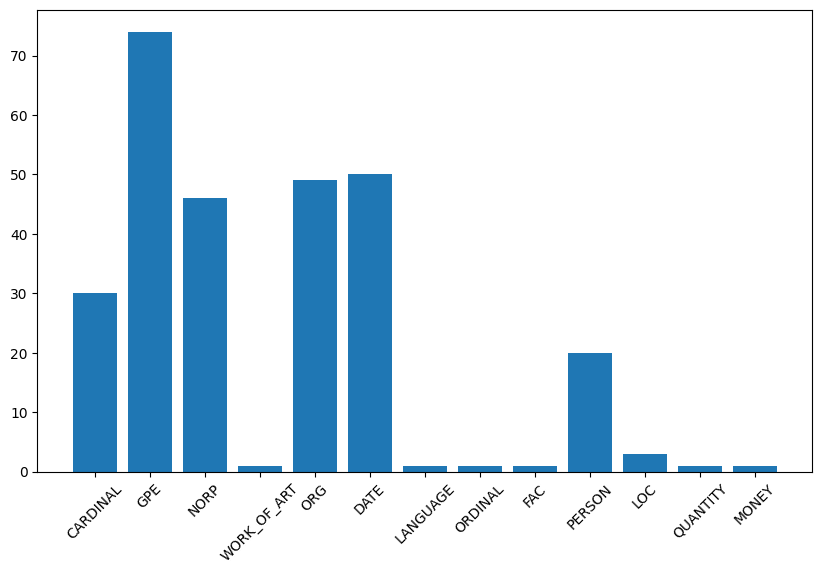

In [6]:
from collections import Counter
import matplotlib.pyplot as plt

sentences = df["Sentence"].dropna().tolist()[:100]
docs = list(nlp.pipe(sentences))
entity_labels = []
for doc in docs:
    entity_labels.extend([ent.label_ for ent in doc.ents])
print(entity_labels)
print(len(entity_labels))

entity_freq = Counter(entity_labels)

plt.figure(figsize=(10, 6))
plt.bar(entity_freq.keys(), entity_freq.values())
plt.xticks(rotation=45)
plt.show()


Step 5

In [7]:
def simplify_dataset_tag(tag):
    if 'geo' in tag or 'gpe' in tag:
        return "GPE"
    elif 'org' in tag:
        return "ORG"
    elif 'per' in tag:
        return "PERSON"
    elif 'nat' in tag:
        return "NORP"
    else:
        return "O"

In [8]:
import ast
tags = df["Tag"].dropna().tolist()[:100]
alltags = []
for taglist in tags:
    taglist = ast.literal_eval(taglist)
    simpletag = [simplify_dataset_tag(t) for t in taglist]
    alltags.extend(simpletag)

In [9]:
import pandas as pd
import ast
from sklearn.metrics import classification_report

df = pd.read_csv("./archive/ner.csv")
df_100 = df.head(100)

nlp = spacy.load("en_core_web_sm")

pred_labels = []

for _, row in df_100.iterrows():
    sentence = row["Sentence"]
    true_tags = ast.literal_eval(row["Tag"])
    doc = nlp(sentence)

    pred_tags = []
    for token in doc:
        tag = token.ent_type_ if token.ent_iob_ != "O" else "O"
        pred_tags.append(tag)

    min_len = min(len(true_tags), len(pred_tags))
    pred_tags = pred_tags[:min_len]
    pred_labels.extend(pred_tags)

print(classification_report(alltags, pred_labels, labels=["GPE", "ORG", "PERSON"], zero_division=0))


              precision    recall  f1-score   support

         GPE       0.87      0.52      0.65       130
         ORG       0.65      0.76      0.70        96
      PERSON       0.79      0.60      0.68        52

   micro avg       0.75      0.62      0.68       278
   macro avg       0.77      0.63      0.68       278
weighted avg       0.78      0.62      0.67       278

